## pandas 02


## Pandas Selsection - Indexing & Slicing

### Series 

#### Series Indexing & Slicing (숫자 인덱스) 
- Numpy Array와 동일하게 대괄호([ ])를 사용하여 특정 요소에 접근 
- 위치가 index가 아니라 '**행 인덱스를 사용**'한다는 점에 유의
- -1로 가장 마지막 요소에 접근 불가 (-1 인덱스는 없기 때문)

In [2]:
# 숫자 인덱스를 갖는 Series 생성
import pandas as pd
s = pd.Series([1, 2, 3, 4, 5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
# indexing을 사용하여 0 인덱스에 대한 value 가져오기
s[0]

1

In [4]:
# slicing을 사용하여 1~2 인덱스에 대한 value 가져오기
s[1:3]

1    2
2    3
dtype: int64

In [5]:
# -1 인덱스를 사용하면 Error를 볼 수 있음
s[-1]

KeyError: -1

####  Series Indexing & Slicing (문자 인덱스)
- Series의 경우 문자열 인덱스를 가질 수 있기 때문에 이름(문자열)을 통해서도 개별
데이터에 접근 가능
- 모든 행에 대해 인덱스가 문자로 지정된 경우에는 위치(숫자)를 동시에 사용 가능
- 문자 인덱스를 이용하여 슬라이싱하는 경우 마지막 값을 포함함

In [6]:
# 문자열 인덱스를 갖는 Series 생성
s = pd.Series([1, 2, 3, 4, 5],
              index=['A','B','C','D','E'])
s

A    1
B    2
C    3
D    4
E    5
dtype: int64

In [7]:
# Series s에서 인덱스가 'A'인 것에 대한 indexing => 정수 반환
s['A']

1

In [8]:
# Series s에서 인덱스가 'B', 'C', 'D' 인 것에 대한 Slicing => Series 반환
# 문자열 인덱스를 사용하여 slicing 하여볼 것

s['B':'D']

B    2
C    3
D    4
dtype: int64

In [10]:
# 정수 index를 사용하여 'B', 'C', 'D' 인 것에 대한 Slicing

s[1:4]

B    2
C    3
D    4
dtype: int64

In [ ]:
# 정수 index를 사용할 수 있으므로 -1 인덱스 가능!
s[-1]

5

### DataFrame
- DataFrame에서 Indexing과 Slicing은 다르게 동작함
- Indexing : 열 단위 선택
- Slicing : 행 단위 선택

####  Indexing, Slicing

In [11]:
df = pd.DataFrame([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],
                  index=['A', 'B', 'C'], columns=['X1', 'X2', 'X3'])
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [12]:
# DataFrame df에서 column의 이름이 'X1'인 것에 대해 indexing
df['X1']
df.X1

A    1
B    4
C    7
Name: X1, dtype: int64

In [13]:
# DataFrame df에서 index의 이름이 'B'인 것부터 마지막까지 slicing

df['B':'C']

,X1,X2,X3
B,4,5,6
C,7,8,9


####  조건, 팬시 인덱싱  

- Boolean DataFrame인 경우 True 값을 가지는 위치의 행 인덱스와 열 인덱스를 기
반으로 선택
- False 값을 가지는 위치는 NaN으로 설정

In [14]:
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [15]:
df % 2 == 0

,X1,X2,X3
A,False,True,False
B,True,False,True
C,False,True,False


In [ ]:
# Boolean DataFrame
# df의 값이 짝수인 것은 그대로, 홀수인 것은  Nan
df[df % 2 == 0]

,X1,X2,X3
A,NaN,2.0,NaN
B,4.0,NaN,6.0
C,NaN,8.0,NaN


In [16]:
#### 홀수인 값만 놔두고 나머지 NaN으로 처리 - 연습문제 

df[df %2 == 1]

,X1,X2,X3
A,1.0,NaN,3.0
B,NaN,5.0,NaN
C,7.0,NaN,9.0


- Boolean List 또는 Boolean Array라면 True 값을 가지는 위치를 기반으로 선택
- Boolean Series인 경우 True 값을 가지는 인덱스를 기반으로 선택

In [19]:
# Boolean List를 사용한 인덱싱 - True 값을 가지는 위치를 기반으로 선택
blist = [True, False, False]
df[blist]

,X1,X2,X3
A,1,2,3


In [20]:
df.columns[blist]

Index(['X1'], dtype='object')

In [21]:
df[ df.columns[blist]]

,X1
A,1
B,4
C,7


In [23]:
# Boolean Series를 사용한 인덱싱 - True 값을 가지는 인덱스를 기반으로 선택
# df['X1']의 값이 짝수 index에 인 것에 대해 가져오기

df[df['X1'] % 2 ==0]

,X1,X2,X3
B,4,5,6


In [22]:
df['X1'] % 2 ==0

A    False
B     True
C    False
Name: X1, dtype: bool

In [ ]:
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [24]:
# index를 ['C','B','A']로 갖는 Series 생성
bs = pd.Series([True, False, False], index=['C','B','A'])
bs

C     True
B    False
A    False
dtype: bool

In [25]:
# bs를 사용한 indexing 확인
df[bs]

C:\Users\hjkim\AppData\Local\Temp\ipykernel_29632\2974907500.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[bs]


,X1,X2,X3
C,7,8,9


In [26]:
# array를 사용하여 가져올 여러 개의 열을 지정
# DataFrame df에 대해 array를 사용하여 'X1', 'X3' 열 가져오기
df[['X1','X3']]

,X1,X3
A,1,3
B,4,6
C,7,9


## Pandas Selection - Indexer
- 기본 indexing, slicing보다 indexer 사용을 권장함
- indexer는 loc, iloc, at, iat이 있음
    - loc, at 인덱서 : 이름 기반 인덱싱
    - iloc, iat 인덱서 : 위치 기반 인덱싱
    - at, iat 인덱서 : 한 개의 값만 반환
- dataframe.인덱서[행 인덱스, 열 인덱스] 와 같이 사용    

### loc 인덱서
- loc 인덱서의 행 또는 열 인덱스
    - 위치(정수)가 아닌 이름(문자열)
    - 이름(문자열)의 리스트나 슬라이싱
    - boolean 리스트, 1차원 배열, 시리즈 (DataFrame은 불가)
- loc 인덱서 사용 방법
    - dataframe.loc[행 인덱스, 열 인덱스]
    - 예) df.loc[:, 'A':'C']    

In [27]:
df = pd.DataFrame([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],
                  index=['A', 'B', 'C'], columns=['X1', 'X2', 'X3'])
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [29]:
# DataFrame df에서 'A' 행, 모든 열에 대해 추출 -> Series 반환

df.loc['A', :]
df.loc['A']

X1    1
X2    2
X3    3
Name: A, dtype: int64

In [30]:
# loc을 사용하여 DataFrame df에서 모든 행, 'X1' 열에 대해 추출 -> Series 반환

df.loc[:, 'X1']

A    1
B    4
C    7
Name: X1, dtype: int64

In [ ]:
# loc을 사용하여 DataFrame df에서 ['A', 'C']행, ['X1', 'X2']열에 대해 추출
df.loc[['A', 'C'],['X1', 'X2']]

,X1,X2
A,1,2
C,7,8


In [31]:
df['X1']%2==0

A    False
B     True
C    False
Name: X1, dtype: bool

In [32]:
# loc을 사용하여 DataFrame df에서 행은 'X1'열의 값이 짝수인 것, 열은 ['X1', 'X3']에 대해 추출

df.loc[df['X1']%2==0, ['X1', 'X3']]

,X1,X3
B,4,6


In [33]:
# df에서 X3 열의 값이 3보다 큰 행, 열은 X2열만 가져오세요. 
df.loc[df['X3'] > 3, 'X2']

B    5
C    8
Name: X2, dtype: int64

### iloc 인덱서
- iloc 인덱서의 행 또는 열 인덱스 형식
   - 위치(정수)
   - 위치(정수)의 리스트나 슬라이싱
   - boolean 리스트, 1차원 배열 (시리즈 불가)
- iloc 인덱서 사용 방법
   - dataframe.iloc[행 인덱스, 열 인덱스]
   - 예) df.loc[:, 1:3]

In [34]:
# iloc을 사용하여 DataFrame df에서 0번 행, 모든 열에 대해 추출 => Series

df.iloc[0, :]

X1    1
X2    2
X3    3
Name: A, dtype: int64

In [35]:
# iloc을 사용하여 DataFrame df에서 모든 행, 0번 열에 대해 추출 => Series

df.iloc[:, 0]

A    1
B    4
C    7
Name: X1, dtype: int64

In [ ]:
# iloc을 사용하여 DataFrame df에서 [0, 2]번 행, [0, 1]번 열에 대해 추출 
df.iloc[[0, 2], [0, 1]]

,X1,X2
A,1,2
C,7,8


In [36]:
# iloc을 사용하여 DataFrame df에서 행의 경우 [False, True, False] boolean list사용
# [0, -1] 열에 대해 추출 
blist = [False, True, False]
df.iloc[blist,[0, -1]]

,X1,X3
B,4,6


### at, iat의 성능
- at, iat 인덱서는 loc, iloc 인덱서와 비슷하지만 하나의 값만 가져옴
- 빠른 인덱싱 속도가 요구되는 경우 사용
- loc, iloc보다 at, iat이 소모 시간이 적음

In [ ]:
%timeit df.loc["A", "X1"]

The slowest run took 23.81 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.15 µs per loop


In [ ]:
%timeit df.at["A", "X1"]

The slowest run took 21.12 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.08 µs per loop


In [ ]:
%timeit df.iloc[0, 0]

The slowest run took 10.18 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 19.6 µs per loop


In [ ]:
%timeit df.iat[0, 0]

The slowest run took 7.52 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 18.4 µs per loop


## Pandas Function

### 데이터 조회
- head(N)
    - Series 또는 DataFrame에서 사용 가능
    - 첫 행부터 아래로 N개(기본 값 5)의 데이터를 조회
- tail(N)
    - Series 또는 DataFrame에서 사용 가능
    - 마지막 행부터 위로 N개(기본 값 5)의 데이터를 조회


In [2]:
df = pd.DataFrame([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],
                  index=['A', 'B', 'C'], columns=['X1', 'X2', 'X3'])
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [40]:
# DataFrame df에서 첫 행부터 1개의 데이터 조회
df.head(2)

,X1,X2,X3
A,1,2,3
B,4,5,6


In [43]:
# DataFrame df에서 마지막 행부터 1개의 데이터 조회
df.tail()

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


### 데이터 빈도 조회
- value_counts(sort, ascending, normalize)
    - 값의 개수를 계산하여 **내림차순**으로 정렬 후 결과 반환
    - sort를 False로 지정하면 결과를 정렬하지 않음
    - ascending을 True로 지정하면 오름차순, False로 지정하면 내림차순 정렬
    - normalize를 True로 지정하면 비율 반환

In [44]:
s = pd.Series(['A', 'B', 'A', 'C', 'A'])
# Series s의 값 개수를 계산하여 내림차순으로 정렬 후 결과 반환
s.value_counts()

A    3
B    1
C    1
dtype: int64

In [45]:
s = pd.Series(['A', 'B', 'A', 'C', 'A'])
# Series s의 값 개수를 계산하여 결과를 비율로 반환 (normalize=True 사용)
s.value_counts(normalize=True)

A    0.6
B    0.2
C    0.2
dtype: float64

### 데이터 정렬


sort_index(axis=0 or 1, ascending=True or False)
- 행(aixs=0) 또는 열(axis=1) 인덱스를 오름차순(ascending=True) 또는 내림차순
(ascending=False)로 정렬 가능
- DataFrame에서만 열(axis=1) 지정 가능

In [46]:
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [48]:
# 행 인덱스 기준 내림차순 정렬
df.sort_index(ascending=False)

,X1,X2,X3
C,7,8,9
B,4,5,6
A,1,2,3


In [50]:
# 열 인덱스 기준 내림차순 정렬
df.sort_index(ascending=False, axis=1)

,X3,X2,X1
A,3,2,1
B,6,5,4
C,9,8,7


sort_values(by, ascending=True or False)
- 특정 컬럼을 기준으로 데이터를 정렬
- DataFrame에서는정렬 기준(by) 지정 필수
- 정렬 기준과 방식을 [ ]로 묶어서 여러 개 설정 가능

In [51]:
s = pd.Series([1,2,3,4,5], index=list("ABCDE"))
s

A    1
B    2
C    3
D    4
E    5
dtype: int64

In [52]:
# Series s를 내림차순 정렬
s.sort_values(ascending=False)

E    5
D    4
C    3
B    2
A    1
dtype: int64

In [53]:
# Series s를 내림차순 정렬 top3

s.sort_values(ascending=False).head(3)

E    5
D    4
C    3
dtype: int64

In [ ]:
# DataFrame df를 정렬 기준을 'X3'열로 하여 내림차순 정렬
df.sort_values(by='X3', ascending=False)

,X1,X2,X3
C,7,8,9
B,4,5,6
A,1,2,3


In [54]:
df.sort_values(by='X3', ascending=False)['X3'].head(2)

C    9
B    6
Name: X3, dtype: int64

In [ ]:
#열추가 
df['X4'] = 10
df

,X1,X2,X3,X4
A,1,2,3,10
B,4,5,6,10
C,7,8,9,10


In [ ]:
#열추가
df['X5'] = df['X2'] + df['X3']
df

,X1,X2,X3,X4,X5
A,1,2,3,10,5
B,4,5,6,10,11
C,7,8,9,10,17


In [4]:
df.loc[4] = [0,0,0]   # 행추가

In [5]:
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9
4,0,0,0


### 데이터 타입 변경


#### astype(str or dict)
- DataFrame의 전체 데이터 유형을 변환하거나 특정 컬럼(Series)만 변경 가능
- 전체 데이터 유형을 변환하기 위해서는 변환하고자 하는 데이터 유형을 문자열로 지정
- 특정 컬럼의 데이터 유형만 변경하고 싶은 경우 딕셔너리 형태로 지정
    - { ‘컬럼명’ : ‘데이터 유형‘}

In [7]:
# DataFrame df의 dtype을 'float'로 변경
# df.dtypes
df = df.astype('float')
df

,X1,X2,X3
A,1.0,2.0,3.0
B,4.0,5.0,6.0
C,7.0,8.0,9.0


In [8]:
# DataFrame df의 'X1', 'X3'열에 대한 dtype을 'float'로 변경
# dict 객체를 사용함
df.astype({'X1':'float', 'X3':'float'})

,X1,X2,X3
A,1.0,2.0,3.0
B,4.0,5.0,6.0
C,7.0,8.0,9.0


####  pd.to_numeric
- pd.to_numeric(1d array or series, errors='ignore', 'raise', 'coerce')
- astype을 이용하여 숫자형으로변경하고자하는 경우 에러가 발생할 수 있음
    - 숫자형으로 변경이 불가능한 데이터가 존재하는 경우 발생하며 주로 문자열에서 많이
발생함
- to_numeric 함수를 이용하면 에러 유형에 따라 변환 방법을 지정 가능
    - erros를 ignore로 설정하는 경우 에러가 발생하지 않고 변경이 안됨
    - erros를 raise로 설정하는 경우 에러를 발생시킴 (기본 값)
    - erros를 coerce로 설정하는 경우 에러가 발생한 데이터는 NaN으로 변환

In [10]:
# 문자열 값을 갖는 Series 생성
str_series = pd.Series(['1', '2', '3', '4', 'a'])
str_series

0    1
1    2
2    3
3    4
4    a
dtype: object

In [ ]:
# 숫자로 변경할 수 없는 'a'가 있어 Error 발생
pd.to_numeric(str_series, errors='raise') # Error 

In [12]:
# 숫자로 변경할 수 없는 'a'가 있어 numeric으로 변환하지 않음
pd.to_numeric(str_series, errors='ignore')

0    1
1    2
2    3
3    4
4    a
dtype: object

In [13]:
# 숫자로 변경할 수 없는 'a'에 대해 NaN 으로 대체하고 float64로 변경
pd.to_numeric(str_series, errors='coerce')    ####

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

#### pd.to_datetime
- pd.to_datetime(dataframe)
   - DataFrame의 컬럼명이 ‘year’, ‘month’, ‘day’, ‘hour’, ‘minute’, ‘second’, ‘ms’, ‘us’,
‘ns’과 같다면 날짜 형식 데이터 반환
- pd.to_datetime(1d array or series, format)
   - 문자열 또는 숫자로 지정된 데이터를 날짜 형식으로 변환
   - format을 지정하면 변환 속도가 빨라짐


In [14]:
# 특정 열이름(year, month, day)을 갖는 DataFrame 생성
date = pd.DataFrame({
    'year' : [2020, 2019, 2018],
    'month': [1, 1, 1],
    'day' : [1, 1, 1]
})
date

,year,month,day
0,2020,1,1
1,2019,1,1
2,2018,1,1


In [15]:
# 특정 열이름(year, month, day)를 갖는 DataFrame을 사용하여 
# dtype이 datetime인 Series 생성
pd.to_datetime(date)

0   2020-01-01
1   2019-01-01
2   2018-01-01
dtype: datetime64[ns]

In [18]:
# 날짜 형식의 문자열을 item으로 하는 list를 사용하여 
# dtype이 datatime인 DatetimeIndex 생성
datelist = ['2020-01-01', '2019-01-01', '2018-01-01']
pd.to_datetime(datelist, format='%Y-%m-%d')

DatetimeIndex(['2020-01-01', '2019-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
# 날짜 형식의 문자열을 item으로 하는 list를 사용하여 
# format 지정하여, dtype이 datatime인 DatetimeIndex 생성 
date = ['01012020', '01012019', '01012018']
#pd.to_datetime(date)  # 자동으로 날짜 형식 인지가 안됨
pd.to_datetime(date, format="%m%d%Y")  # 형식을 알려줌

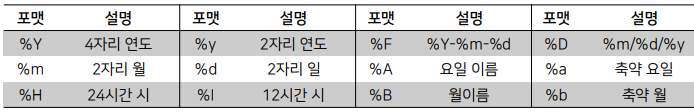

#### 날짜 범위 생성
- pd.date_range(start, end, periods, freq)
   - 특정 날짜/시간 범위의 데이터 생성 가능
   - periods(데이터의 개수), freq(생성 주기)

In [19]:
# date_range(start, periods)를 사용하여 
# 2020년 1월 1일 ~ 10일까지의 날짜를 갖는 dtype이 datatime인 DatetimeIndex 생성
pd.date_range('20200101', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [22]:
# date_range(start, end, freq='S')를 사용하여 
# 2020-01-01 00:00:00  ~ 2020-12-31 00:00:00 까지의 데이터를 갖는 
# dtype이 datatime인 DatetimeIndex 생성
index = pd.date_range('2020-01-01','2020-12-31', freq='S')
index
#pd.DataFrame(값, index = pd.date_range('2020-01-01','2020-12-31', freq='S') )

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               ...
               '2020-12-30 23:59:51', '2020-12-30 23:59:52',
               '2020-12-30 23:59:53', '2020-12-30 23:59:54',
               '2020-12-30 23:59:55', '2020-12-30 23:59:56',
               '2020-12-30 23:59:57', '2020-12-30 23:59:58',
               '2020-12-30 23:59:59', '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', length=31536001, freq='S')

###  데이터 삭제
- drop(labels, axis, inplace)
   - labels로 지정된 행(axis=0) 또는 열(axis=1)이 삭제된 결과 반환
   - 삭제 대상이 여러 개인 경우 행 또는 **열 인덱스를 [ ]로 묶어서 설정**
   - 결과를 반환하지 않고 원본에 바로 적용하고자 하는 경우 inplace를 True로 설정

In [23]:
df

,X1,X2,X3
A,1.0,2.0,3.0
B,4.0,5.0,6.0
C,7.0,8.0,9.0


In [26]:
# DataFrame에서 행 인덱스가 'A'인 행 삭제 
df.drop('A')

In [27]:
df

,X1,X2,X3
B,4.0,5.0,6.0
C,7.0,8.0,9.0


In [28]:
# DataFrame에서 열 인덱스가 ['X1', 'X3']인 열 삭제 
df.drop(['X1', 'X3'], axis=1)  


,X2
B,5.0
C,8.0


### 데이터 구간별 범주화
- pd.cut(x, bins, right, labels, …)
- 연속 데이터를 구간별 범주화

In [12]:
import pandas as pd
ages = [0, 15, 10, 21, 23, 37, 31, 61, 20, 41, 32, 100]
bins = [0, 15, 25, 35, 60, 100]
labels = ['어린이', '청년', '장년', '중년', '노년']
cuts = pd.cut(ages, bins, right=False, labels=labels)
cuts

['어린이', '청년', '어린이', '청년', '청년', ..., '노년', '청년', '중년', '장년', NaN]
Length: 12
Categories (5, object): ['어린이' < '청년' < '장년' < '중년' < '노년']

In [14]:
pd.cut(ages, bins, labels=labels, include_lowest=True)


['어린이', '어린이', '어린이', '청년', '청년', ..., '노년', '청년', '중년', '장년', '노년']
Length: 12
Categories (5, object): ['어린이' < '청년' < '장년' < '중년' < '노년']

In [32]:
cuts.value_counts()

어린이    2
청년     4
장년     2
중년     2
노년     1
dtype: int64

In [10]:
# dtypes : 판다스에서 여러열의 데이터 타입리턴  (모든 Pandas 개체에있는 속성)
# dtype : 데이터의 타입리턴 (모든 NumPy 배열에있는 속성)

df.dtypes

X1    int64
X2    int64
X3    int64
dtype: object

In [8]:
df['X1'].dtypes

dtype('int64')

In [9]:
df['X1'].dtype

dtype('int64')

## 통계함수
- Pandas는 배열의 주어진 요소로 부터 최소, 최대, 백분위수, 표준 편차, 분산 등을 찾
는데 유용한 통계 함수가 존재
- 통계 함수는 배열에서 요소별로 작동하며axis 옵션을 통해 연산 방향을 지정할 수 있
음
    - axis이 0으로 지정 된 경우 행과 행의 연산 결과 반환 (기본 값)
    - axis이 1로 지정 된 경우 열과 열의 연산 결과 반환
- min, max, sum, mean, median, quantile, std, var, corrcoef, argmin, argmax,
cumsum, cumprod 등

In [2]:
import pandas as pd 
df = pd.DataFrame([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],
                  index=['A', 'B', 'C'], columns=['X1', 'X2', 'X3'])
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [3]:
# DataFrame df의 행과 행의 합(sum)결과 반환
df.sum()

X1    12
X2    15
X3    18
dtype: int64

In [4]:
# DataFrame df의 열과 열의 합(sum)결과 반환
df.sum(axis=1)

A     6
B    15
C    24
dtype: int64

In [5]:
# DataFrame df의 열별 통계 값 출력
# count, mean, std, min, 25%, 50%, 75%, max
df.describe()

,X1,X2,X3
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [6]:
#DataFrame 전체의 개수를 구하는 경우 
df.count()

X1    3
X2    3
X3    3
dtype: int64

In [8]:
#단일 column의 데이터 개수를 구하는 경우 
df['X1'].count()

3

In [9]:
#DataFrame 평균 
df.mean()

X1    4.0
X2    5.0
X3    6.0
dtype: float64

In [10]:
#Column 평균 
df['X1'].mean()

4.0

In [12]:
# 조건별 평균도 계산 가능 
condition = (df['X1'] > 3)
df.loc[condition, 'X1'].mean()

5.5

#### skipna=True 옵션 
- 기술통계 함수에서는 skipna=True 가 기본으로 설정 
    - 만약, skipna=False로 설정하게 된다면 NaN값이 있는 column은 NaN값으로 출력 

In [41]:
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [16]:
#NaN이 있는 경우 
import numpy as np 
df.loc['A', 'X1'] = np.NaN
df

,X1,X2,X3
A,NaN,2,3
B,4.0,5,6
C,7.0,8,9


In [17]:
df.mean(skipna=False)    

X1    NaN
X2    5.0
X3    6.0
dtype: float64

In [18]:
df.mean(skipna=True)

X1    5.5
X2    5.0
X3    6.0
dtype: float64

#### median() 중앙값
- 데이터의 중앙값을 출력 
    - 중앙값: 데이터를 오름차순으로 정렬하여 중앙에 위치한 값 
- 이상치(Outlier)가 존재하는 경우, 평균보다 중앙값을 대표값으로 더 선호 

In [19]:
pd.Series([1,2,3,4,5]).median()

3.0

In [20]:
pd.Series([4,5,1,2,3]).median()

3.0

In [22]:
# 짝수개의 데이터가 있는 경우, 가운데 2개 중앙 데이터의 평균값을 출력 
pd.Series([1,2,3,4,5,6]).median()

3.5

In [32]:
# 평균과 중앙값은 약간의 차이 있음 
s = pd.Series([1,2,3,4,5,10])
print(f'''평균: {s.mean():.5f}
중앙값: {s.median():.5f}
차이: {s.mean() - s.median():.5f} ''')

평균: 4.16667
중앙값: 3.50000
차이: 0.66667 


#### sum() 합계
- NaN을 제외한 데이터 합계 
    - 문자열 column은 모든 데이터가 붙어서 출력될수 있음 

In [33]:
df.sum()

X1    11.0
X2    15.0
X3    18.0
dtype: float64

In [36]:
df['X1'].sum()

11.0

#### var() - 분산 
- 어떤 대상의 흩어진 정도나 상태로 편차 제곱의 평균값으로 계산 가능 


In [51]:
# 평균 
m = df['X2'].values.mean()

#분산 
v = ((df['X2'].values - m)**2).sum() /\
    (df['X2'].count() - 1)

v

9.0

In [52]:
df['X2'].var()

9.0

#### std() 표준편차 
- 표준편차는 자료의 산포도를 나타내는 수치로 분산의 양의 제곱근으로 정의 

In [53]:
np.sqrt(df['X2'].var())

3.0

In [54]:
np.sqrt(v)

3.0

In [55]:
df['X2'].std()

3.0

#### min() - 최소값, max() - 최대값

In [58]:
df["X2"].min()

2

In [59]:
df["X2"].max()

8

#### unique() -고유값, nuniqe() - 고유값 개수 
- 고유값과 고유값의 개수를 구하고자 할때 사용 

In [61]:
df['X4'] = ['man', 'man', 'woman']
df

,X1,X2,X3,X4
A,NaN,2,3,man
B,4.0,5,6,man
C,7.0,8,9,woman


In [62]:
df['X4'].unique()

array(['man', 'woman'], dtype=object)

In [63]:
df['X4'].nunique()

2

#### quantile() - 분위 
- Quantile이란 주어진 데이터를 동등한 크기로 분할하는 지점 
- 10%의 경우 0.1을, 80%의 경우 0.8을 대입하여 값을 계산 

In [65]:
df['X2'].quantile(0.1)

2.6

In [66]:
df['X2'].quantile(0.8)

6.800000000000001

#### mode() - 최빈값
- 최빈값은 가장 많이 출여한 데이터를 의미

In [69]:
df['X4'].mode()

0    man
dtype: object

#### corr() - 상관관계
- corr()로 컬럼(column)별 상관 관계를 확인할수 있음 
- -1에 가까울수록 반비례 관계, 1에 가까울수록 정비례 관계를 의미

In [70]:
df.corr()

,X1,X2,X3
X1,1.0,1.0,1.0
X2,1.0,1.0,1.0
X3,1.0,1.0,1.0
